In [130]:
import random
import matplotlib.pyplot as plt

In [148]:
pages_links = {
    'wikipedia': ['youtube', 'facebook', 'khan'],
    'facebook': ['youtube', 'instagram'],
    'youtube': ['facebook', 'github', 'khan', 'freecodecamp'],
    'instagram': ['facebook', 'freecodecamp'],
    'github': ['freecodecamp', 'khan', 'wikipedia'],
    'freecodecamp': ['khan', 'github', 'youtube'],
    'khan': ['wikipedia', 'facebook']
}
pages_entrances = {}
pages_degs = {}
for page in pages_links:
    pages_entrances[page] = 0
    pages_degs[page] = {'deg_in': 0, 'deg_out': len(pages_links[page])}
for page in pages_links:
    for page_link in pages_links[page]:
        pages_degs[page_link]['deg_in'] += 1
pages_degs

{'wikipedia': {'deg_in': 2, 'deg_out': 3},
 'facebook': {'deg_in': 4, 'deg_out': 2},
 'youtube': {'deg_in': 3, 'deg_out': 4},
 'instagram': {'deg_in': 1, 'deg_out': 2},
 'github': {'deg_in': 2, 'deg_out': 3},
 'freecodecamp': {'deg_in': 3, 'deg_out': 3},
 'khan': {'deg_in': 4, 'deg_out': 2}}

In [141]:
current_page = 'wikipedia'
for i in range(0, 100000):
    current_page = random.choice(pages_links[current_page])
    pages_entrances[current_page] += 1
print('done')

done


In [142]:
websites = list(pages_entrances.keys())
entrances = list(pages_entrances.values())
print(entrances)

[10944, 21587, 18691, 10819, 8988, 13093, 15878]


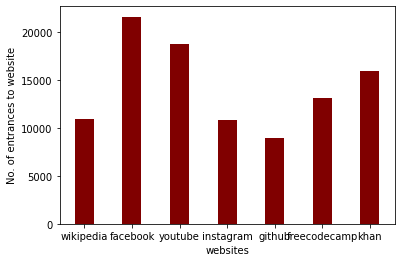

In [143]:
plt.bar(websites, entrances, color ='maroon',
        width = 0.4)
 
plt.xlabel('websites')
plt.ylabel("No. of entrances to website")
plt.title('')
plt.show()